## Use case of KMEAN solution and PCA (principal components) to get insight and visualize dataset on income

In [1]:
# importlibs
%pylab inline 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics # metrics to measure shapes and clustering description

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import data
train_data = pd.read_csv(r"datasets/income/train-data.csv")
test_data = pd.read_csv(r"datasets/income/test-data.csv")

In [3]:
# insight on data
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)
train_data.head()

Shape of training data : (100, 5)
Shape of testing data : (100, 5)


,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,30,34,73,1,0
1,36,103,85,1,0
2,54,101,24,1,0
3,28,101,68,0,1
4,24,39,65,1,0


### TRYING DEFAULT K-MEANS VALUE ON NON NORMALIZE DATA

In [4]:
#default model K-means
model = KMeans()
# fitting model
model.fit(train_data)
# Clusters number
print('Default number of Clusters : ',model.n_clusters)

Default number of Clusters :  8


In [5]:
# categorize on training data
predict_train = model.predict(train_data)
print('CLusters on train data',predict_train)
# categorize on test data
predict_test = model.predict(test_data)
print('\nClusters on test data',predict_test)

CLusters on train data [0 6 4 6 0 1 1 2 6 7 2 2 5 4 2 2 4 3 1 0 3 5 5 4 3 4 2 2 4 5 3 5 5 4 4 2 7
 2 7 5 4 7 2 2 4 5 5 4 6 2 5 4 1 2 4 2 1 7 0 7 5 0 1 4 5 4 3 5 5 2 1 2 0 1
 6 6 0 5 1 5 1 5 2 1 7 1 4 5 7 5 3 6 2 4 2 1 5 0 2 0]

Clusters on test data [5 0 7 4 1 0 4 5 1 3 5 3 1 1 1 5 5 1 1 6 4 4 1 1 5 1 4 0 1 4 2 0 5 1 0 4 2
 2 5 4 4 0 7 4 1 5 1 6 5 5 3 0 5 2 0 5 2 5 5 7 5 5 1 2 6 1 2 1 5 5 1 7 4 2
 1 4 5 4 5 0 5 1 3 4 7 0 5 1 0 4 0 3 5 1 4 0 0 0 2 4]


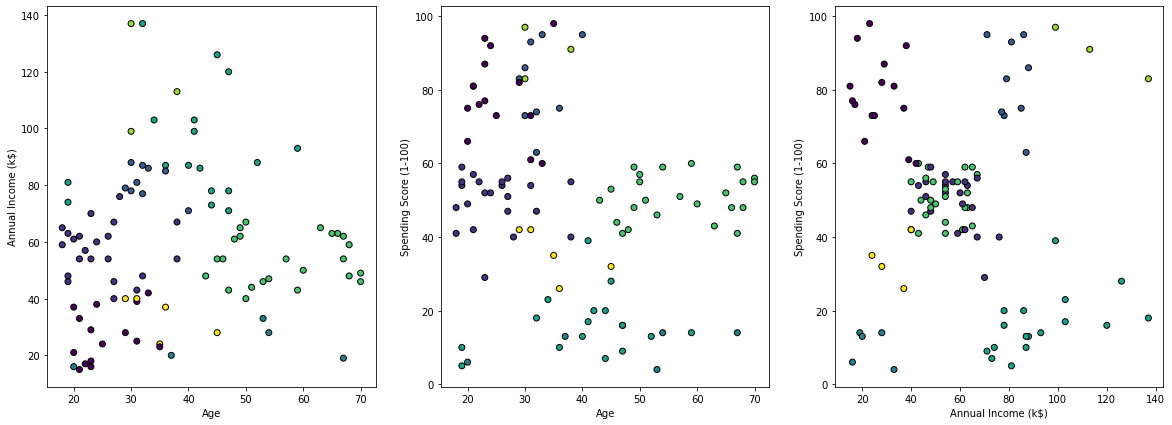

In [6]:
# Set-up grid for plotting.
fig, sub = plt.subplots(1, 3,figsize=(20,7))
plt.subplots_adjust(wspace=0.2, hspace=0.1)

couple = [["Age","Annual Income (k$)"],
           ["Age","Spending Score (1-100)"],
           ["Annual Income (k$)","Spending Score (1-100)"]]

for i,ax in zip(range(0,len(couple)), sub.flatten()):
    col1 = couple[i][0]
    col2 = couple[i][1] 
    
    #ax.scatter(test_data[col1],test_data[col2],c=predict_test, cmap=plt.cm.coolwarm,edgecolors='k')
    ax.scatter(test_data[col1],test_data[col2],c=predict_test, edgecolors='k')
    #ax.contourf(xx, yy, Z, **params)
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
#    ax.set_xticks(())
#    ax.set_yticks(())

plt.show()

# SEARCH FOR OPTIMAL CLUSTERING ON NORMALIZED DATA

In [47]:
# normalizing variables
from sklearn import preprocessing

#X_norm = preprocessing.scale(train_data)
myscaler = preprocessing.StandardScaler().fit(train_data)
X_norm = scaler.transform(train_data)
print (X_norm[:5,:])

[[-0.76478095 -1.10462532  0.84308166  0.90453403 -0.90453403]
 [-0.30127734  1.60394423  1.29014219  0.90453403 -0.90453403]
 [ 1.08923347  1.52543497 -0.98241552  0.90453403 -0.90453403]
 [-0.91928215  1.52543497  0.65680644 -1.1055416   1.1055416 ]
 [-1.22828455 -0.90835217  0.5450413   0.90453403 -0.90453403]]


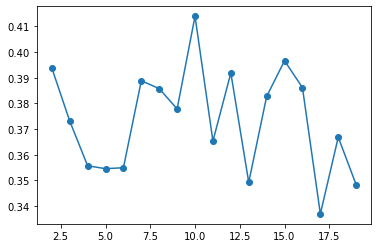

In [8]:
silhouettes = []
# exploration loop for 2 to 10 clusters to determine optimum
clust_range = range(2,20)

for num_clusters in clust_range : 
    cls = KMeans(n_clusters = num_clusters,
                         n_init=10, # number of repetition (to minimise starting point sensibility)
                         init='random') #initialistion aleatoire
    
    cls.fit(X_norm) #compute clustering
    # silhouette coef on normalize data, according to clusters labels
    silh_measure = metrics.silhouette_score(X_norm, cls.labels_) 
    
    #saving coef
    silhouettes.append(silh_measure) 

#graph on silhouette coef per number of clusters
plt.plot(clust_range, silhouettes, marker='o')

# NOTA : WE SEARCH A HIGH SILHOUETTE COEF
# Here best results are on 9-10 clusters

In [9]:
# model definition
model_n3 = KMeans(n_clusters=10)
# fit on normed training data 
model_n3.fit(X_norm)
# categorize on training data
predict_train_3 = model_n3.predict(X_norm)
print('CLusters on train data',predict_train_3)
# categorize on test data
predict_test_3 = model_n3.predict(X_norm)
print('\nClusters on test data',predict_test_3) 

CLusters on train data [5 3 6 1 5 0 0 1 3 2 1 1 6 6 1 3 0 8 0 5 8 6 2 2 8 2 1 3 0 2 8 2 6 4 4 1 8
 3 8 6 2 8 3 1 0 6 6 4 1 1 2 4 0 1 4 1 0 9 7 8 2 5 7 6 6 4 9 6 2 1 2 3 5 2
 3 3 7 6 0 2 0 6 3 0 8 0 2 6 7 6 9 3 3 4 1 7 2 7 3 5]

Clusters on test data [5 3 6 1 5 0 0 1 3 2 1 1 6 6 1 3 0 8 0 5 8 6 2 2 8 2 1 3 0 2 8 2 6 4 4 1 8
 3 8 6 2 8 3 1 0 6 6 4 1 1 2 4 0 1 4 1 0 9 7 8 2 5 7 6 6 4 9 6 2 1 2 3 5 2
 3 3 7 6 0 2 0 6 3 0 8 0 2 6 7 6 9 3 3 4 1 7 2 7 3 5]


# VISUALISATION USING PCA FOR PLOTTING

In [10]:
# to visualise clusters, use principal component analysis to REDUCE PLOTTING COMPONENTS
from sklearn import decomposition
pca = decomposition.PCA(n_components=3) # init Pca for 2 component
pca.fit(X_norm) # computing PCA

# print quantity of explain variable per principal component
print('Explained Variance per Components :',pca.explained_variance_ratio_)

# data Organized by principal components
X_trans = pca.transform(X_norm) 

Explained Variance per Components : [0.40852038 0.30010448 0.17314012]


NOTA : first component explain 40% of variable ; second component add 30% of variable explanation

3 components is enough : 89% of variable is explained

[[ 0.03302646  0.18489959 -0.03483009 -0.6940851   0.6940851 ]
 [ 0.63753696 -0.39377607 -0.66153717 -0.02068337  0.02068337]
 [-0.37025563 -0.89153157  0.182118   -0.13212734  0.13212734]]


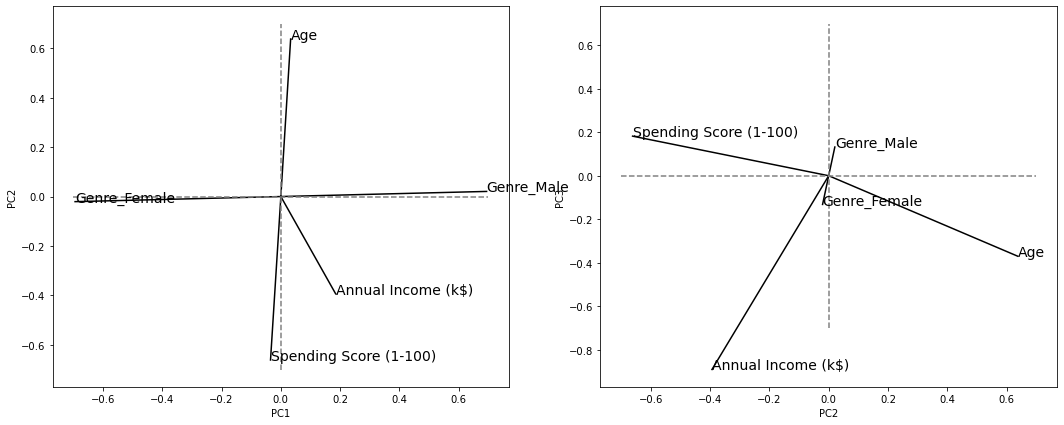

In [12]:
# VIZUALISATION OF EACH VARIABLE CONTRIBUTION TO THE 2 MAINS COMPONENTS
pcs = pca.components_
print(pcs)

# Set-up grid for plotting.
fig, sub = plt.subplots(1, 2,figsize=(18,7))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

ax= sub[0]
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # draw line from origin to (x, y)
    ax.plot([0, x], [0, y], color='k')
    # show variable name (data.columns[i])
    ax.text(x, y, train_data.columns[i], fontsize='14')

#ax.xlabel('PC1')
#ax.ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# horizontal ligne y=0
ax.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# vertical ligne x=0
ax.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

#ax.xlim([-0.7, 0.7])
#ax.ylim([-0.7, 0.7])

ax= sub[1]
for i, (x, y) in enumerate(zip(pcs[1, :], pcs[2, :])):
    ax.plot([0, x], [0, y], color='k')
    ax.text(x, y, train_data.columns[i], fontsize='14')

ax.set_xlabel('PC2')
ax.set_ylabel('PC3')

ax.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
ax.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')


here, principal components are explained by :

1 - DIFFERENCE IN SEXE

2 - AGE and spending score which have inverse correlation

3 - mostly explained with Annual income

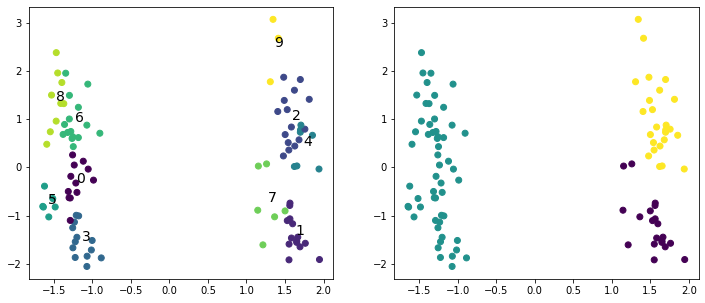

In [27]:
fig = plt.figure(figsize=(12,5))

#first figure computation on KMEANS MODEL
ax= fig.add_subplot(121) #spacial positionning into fig
# projecting data with x:first component and y:second component
# colouring with clusters label
ax.scatter(X_trans[:,0], X_trans[:,1], c=model_n3.labels_)

subsets =[]
for i in range(0,10):
    subset = np.array([X_trans[num] for num in range(0,len(X_trans)) if model_n3.labels_[num]==i])
    ax.text(mean(subset[:,0]), mean(subset[:,1]), i, fontsize='14')
    subsets.append(subset)

#second figure computation comparaison to 3 clusters
cls3= KMeans(n_clusters=3) #for 3 clusters
cls3.fit(X_norm) # clusters computing 
ax= fig.add_subplot(122) #spacial positionning into fig
ax.scatter(X_trans[:,0], X_trans[:,1], c=cls3.labels_)

# HERE, The two clusters that CONSUME most are the ones at the bottom : 
# group 1 for femelle
# group 3 for male

In [86]:
# visualisation on specifics subsets caracteristics

ClusterID = []

for i in range (0,9):
    # revert PCA to get real values on a subset :
    Cstudy = subsets[i]
    Cstudy = pca.inverse_transform(Cstudy)
    Cstudy = np.array(myscaler.inverse_transform(Cstudy))
    #print(Cstudy)
    # compute mean and STD
    #print(Cstudy[:,0])
    Id = [mean(Cstudy[:,0]),std(Cstudy[:,0]),mean(Cstudy[:,1]),std(Cstudy[:,1]),mean(Cstudy[:,2]),std(Cstudy[:,2]),mean(Cstudy[:,4])]
    ClusterID.append(Id)


Cstudy = pd.DataFrame(ClusterID)
Cstudy.columns=['Age mean','age std','income mean','income std','score mean','score std',"sex"]
Cstudy

,Age mean,age std,income mean,income std,score mean,score std,sex
0,38.351551,4.995833,67.026582,11.280705,55.495630,8.365434,0.006777
1,29.396247,2.786409,85.314782,14.000489,73.298998,5.551372,0.995717
2,49.591461,5.810834,63.675172,12.715979,30.449764,10.522167,0.995666
3,29.880853,2.901565,86.962016,15.287731,75.481247,5.310358,-0.002374
4,47.227038,4.479882,80.132351,14.158633,37.961804,7.650040,1.014302
5,25.649079,2.115116,27.453152,7.002386,72.739410,3.752874,-0.001821
6,50.157448,5.016493,60.599695,15.103679,31.618624,8.707569,-0.005092
7,25.597014,5.465440,33.281604,16.029380,71.070186,10.697370,1.004069
8,47.105731,6.298996,24.629503,7.924805,30.885645,11.645954,0.004680


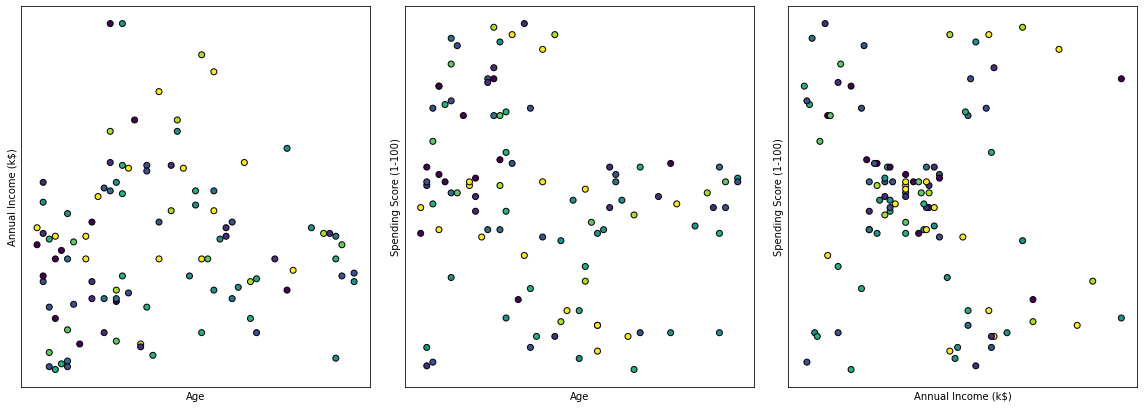

In [62]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 3,figsize=(20,7))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

couple = [["Age","Annual Income (k$)"],
           ["Age","Spending Score (1-100)"],
           ["Annual Income (k$)","Spending Score (1-100)"]]

for i,ax in zip(range(0,len(couple)), sub.flatten()):
    col1 = couple[i][0]
    col2 = couple[i][1]
    
    ax.scatter(test_data[col1],test_data[col2],c=model_n3.labels_, edgecolors='k')

    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()